In [59]:
import warnings
warnings.filterwarnings('ignore')

import sys
import random
import numpy as np
import csv
from sklearn import linear_model, cross_validation, metrics, svm
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
get_ipython().magic(u'matplotlib inline')

In [60]:
def read_tsv( cols, col_types=None):
  fhandle = open('/root/temp/000000_0', 'r')
  pieces = []
  pieces.append(pd.read_csv(fhandle, names=cols, dtype=col_types,header=None, delimiter="\t"))
  fhandle.close()
  return pd.concat(pieces, ignore_index=True)

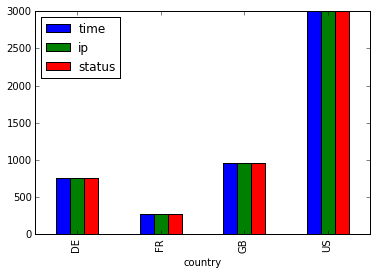

In [61]:
cols = ['time', 'ip', 'country', 'status'];
pHandle = read_tsv( cols)

pHandle.shape

df = pHandle[pHandle['country']=='US'].dropna(subset=['status'])
df

grouped = pHandle.groupby('country').count()
grouped.plot(kind='bar')

In [62]:
%%writefile preprocess1.pig
DEFINE preprocess( ) returns data {
    
    tmp = LOAD '/root/data_1' using PigStorage(',')
    as ( time: chararray, ip: chararray, country: chararray, status: chararray);
    $data = filter tmp by country=='US';
        };
    data = preprocess();
    STORE data INTO '/root/output';
    copyToLocal /root/output /root/output)


Overwriting preprocess1.pig


In [63]:
%%bash --err pig_out --bg 
pig -f preprocess1.pig

Starting job # 8 in a separate thread.


In [64]:
while True:
    line = pig_out.readline()
    if not line: 
        break
    sys.stdout.write("%s" % line)
    sys.stdout.flush()

15/10/10 20:47:06 INFO pig.ExecTypeProvider: Trying ExecType : LOCAL
15/10/10 20:47:06 INFO pig.ExecTypeProvider: Trying ExecType : MAPREDUCE
15/10/10 20:47:06 INFO pig.ExecTypeProvider: Picked MAPREDUCE as the ExecType
2015-10-10 20:47:06,523 [main] INFO  org.apache.pig.Main - Apache Pig version 0.15.0.2.3.0.0-2557 (rexported) compiled Jul 14 2015, 10:10:23
2015-10-10 20:47:06,523 [main] INFO  org.apache.pig.Main - Logging error messages to: /usr/hdp/2.3.0.0-2557/pig/pig_1444510026521.log
2015-10-10 20:47:07,871 [main] INFO  org.apache.pig.impl.util.Utils - Default bootup file /root/.pigbootup not found
2015-10-10 20:47:08,093 [main] INFO  org.apache.pig.backend.hadoop.executionengine.HExecutionEngine - Connecting to hadoop file system at: hdfs://sandbox.hortonworks.com:8020
2015-10-10 20:47:09,958 [main] INFO  org.apache.pig.tools.pigstats.ScriptState - Pig features used in the script: FILTER
2015-10-10 20:47:10,020 [main] INFO  org.apache.pig.data.SchemaTupleBackend - Key [pig.schem

In [65]:
def read_dataset(cols):
  fhandle = open('/root/output/part-m-00000', 'r')
  pieces = []
  pieces.append(pd.read_csv(fhandle, names=cols, dtype=None,header=None, delimiter="\t"))
  fhandle.close()
  return pd.concat(pieces, ignore_index=True)

In [66]:
cols = ['time', 'ip', 'country', 'status'];
pHandle = read_dataset( cols)

pHandle.shape

(2998, 4)

In [69]:
# note data is randomly generated so go to /root/output/part-m-00000 
# and select values that exist for the query
values = ['159.128.147.226', '205.244.156.140']
df2 = pHandle[pHandle['ip'].isin(values)]
df2

,time,ip,country,status
10,2015-10-07T15:50:26,159.128.147.226,US,SUCCESS
14,2015-10-07T15:50:26,205.244.156.140,US,SUCCESS
